# AutoEncoding

In [1]:
import random, os

import numpy as np

from matplotlib import pyplot as plt

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D
from tensorflow.keras.preprocessing.image import load_img, img_to_array

## Dataset Import and Initial Visualization

In [2]:
training_set, testing_set = mnist.load_data()
x_train, y_train = training_set
x_test, y_test = testing_set

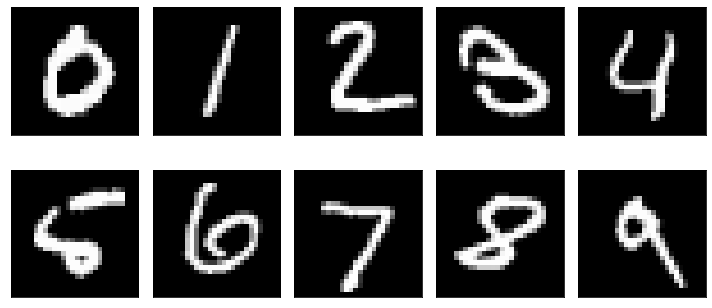

In [3]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(10,5))
for idx, ax in enumerate([ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10]):
    for i in range(1000):
        if y_test[i] == idx:
            ax.imshow(x_test[i], cmap='gray')
            ax.grid(False)
            ax.set_xticks([])
            ax.set_yticks([])
            break
plt.tight_layout()
plt.show()

## Basic Autoencoder

In [4]:
model = Sequential()

In [5]:
hidden_layer_size = 1
model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
model.add(Dense(units=784, activation='sigmoid'))

In [6]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 785       
_________________________________________________________________
dense_1 (Dense)              (None, 784)               1568      
Total params: 2,353
Trainable params: 2,353
Non-trainable params: 0
_________________________________________________________________


In [7]:
def create_autoencoder(hidden_layer_size):
    model = Sequential()
    model.add(Dense(units=hidden_layer_size, input_shape=(784,), activation='relu'))
    model.add(Dense(units=784, activation='sigmoid'))
    return model

In [8]:
# Reshape
x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]*x_train.shape[2]))
x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]*x_test.shape[2]))

In [9]:
# Normalize
x_train_reshaped = x_train_reshaped/255
x_test_reshaped = x_test_reshaped/255

In [10]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
model.fit(x_train_reshaped, x_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 753us/step - loss: 0.0750
Epoch 2/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.0653
Epoch 3/10
1875/1875 [==============================] - 2s 812us/step - loss: 0.0641
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0635
Epoch 5/10
1875/1875 [==============================] - 2s 819us/step - loss: 0.0632
Epoch 6/10
1875/1875 [==============================] - 2s 833us/step - loss: 0.0629
Epoch 7/10
1875/1875 [==============================] - 2s 801us/step - loss: 0.0624
Epoch 8/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0620
Epoch 9/10
1875/1875 [==============================] - 1s 720us/step - loss: 0.0616
Epoch 10/10
1875/1875 [==============================] - 1s 700us/step - loss: 0.0613


In [12]:
output = model.predict(x_test_reshaped)

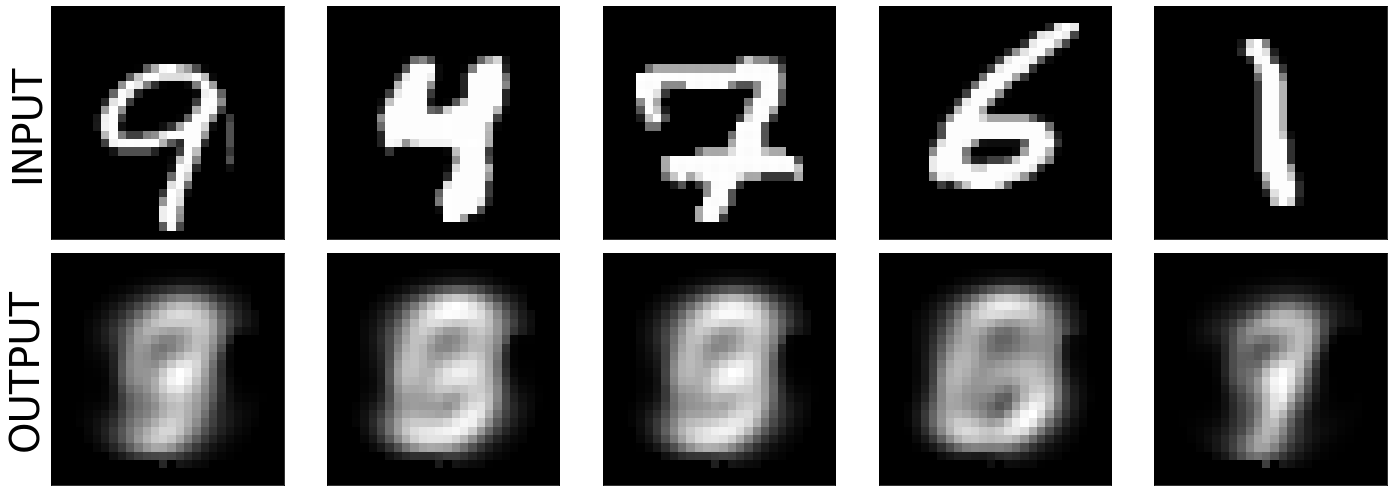

In [13]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10)) = plt.subplots(2, 5, figsize=(20,7))
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)
for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(x_test[randomly_selected_imgs[i]], cmap='gray')
    if i == 0:
        ax.set_ylabel('INPUT', size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])
    
for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    if i == 0:
        ax.set_ylabel('OUTPUT', size=40)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

In [14]:
hiddenLayerSize_2_model = create_autoencoder(hidden_layer_size=2)
hiddenLayerSize_4_model = create_autoencoder(hidden_layer_size=4)
hiddenLayerSize_8_model = create_autoencoder(hidden_layer_size=8)
hiddenLayerSize_16_model = create_autoencoder(hidden_layer_size=16)
hiddenLayerSize_32_model = create_autoencoder(hidden_layer_size=32)

In [15]:
hiddenLayerSize_2_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_2_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_4_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_4_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_8_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_8_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_16_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_16_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

hiddenLayerSize_32_model.compile(optimizer='adam', loss='mean_squared_error')
hiddenLayerSize_32_model.fit(x_train_reshaped, x_train_reshaped, epochs=10, verbose=0)

In [16]:
output_2_model = hiddenLayerSize_2_model.predict(x_test_reshaped)
output_4_model = hiddenLayerSize_4_model.predict(x_test_reshaped)
output_8_model = hiddenLayerSize_8_model.predict(x_test_reshaped)
output_16_model = hiddenLayerSize_16_model.predict(x_test_reshaped)
output_32_model = hiddenLayerSize_32_model.predict(x_test_reshaped)

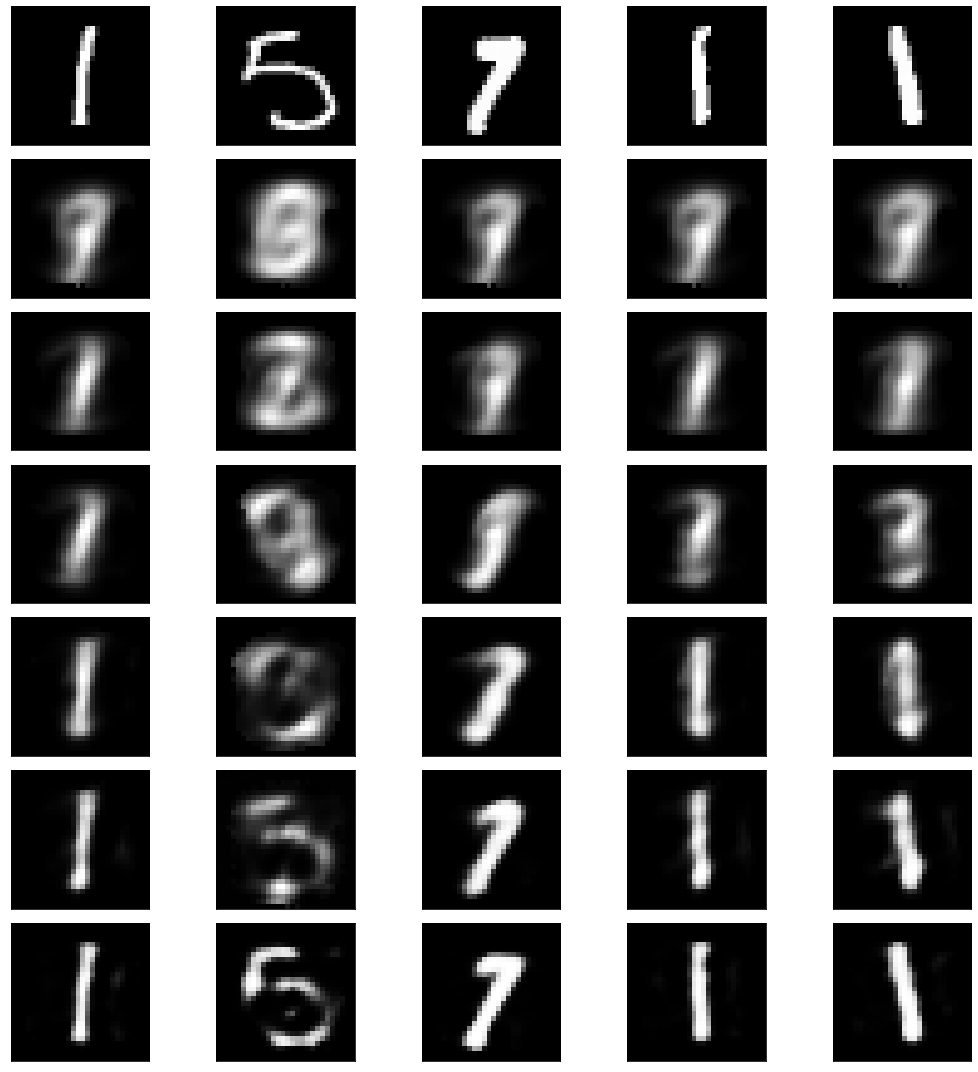

In [17]:
fig, axes = plt.subplots(7, 5, figsize=(15,15))

randomly_selected_imgs = random.sample(range(output_2_model.shape[0]),5)
outputs = [x_test, output, output_2_model, output_4_model, output_8_model, output_16_model, output_32_model]

for row_num, row in enumerate(axes):
    for col_num, ax in enumerate(row):
        ax.imshow(outputs[row_num][randomly_selected_imgs[col_num]].reshape(28,28), cmap='gray')
        ax.grid(False)
        ax.set_xticks([])
        ax.set_yticks([])

plt.tight_layout()
plt.show()

## Denoising

In [18]:
x_train_noisy = x_train_reshaped + np.random.normal(0, 0.5, size=x_train_reshaped.shape)
x_test_noisy = x_test_reshaped + np.random.normal(0, 0.5, size=x_test_reshaped.shape)

In [19]:
x_train_noisy = np.clip(x_train_noisy, a_min=0, a_max=1)
x_test_noisy = np.clip(x_test_noisy, a_min=0, a_max=1)

In [20]:
basic_denoise_autoencoder = create_autoencoder(16)

In [21]:
basic_denoise_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
basic_denoise_autoencoder.fit(x_train_noisy, x_train_reshaped, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0466
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0303
Epoch 3/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0291
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0288
Epoch 5/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0287
Epoch 6/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0285
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0284
Epoch 8/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0284
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0282
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0282


In [22]:
output = basic_denoise_autoencoder.predict(x_test_noisy)

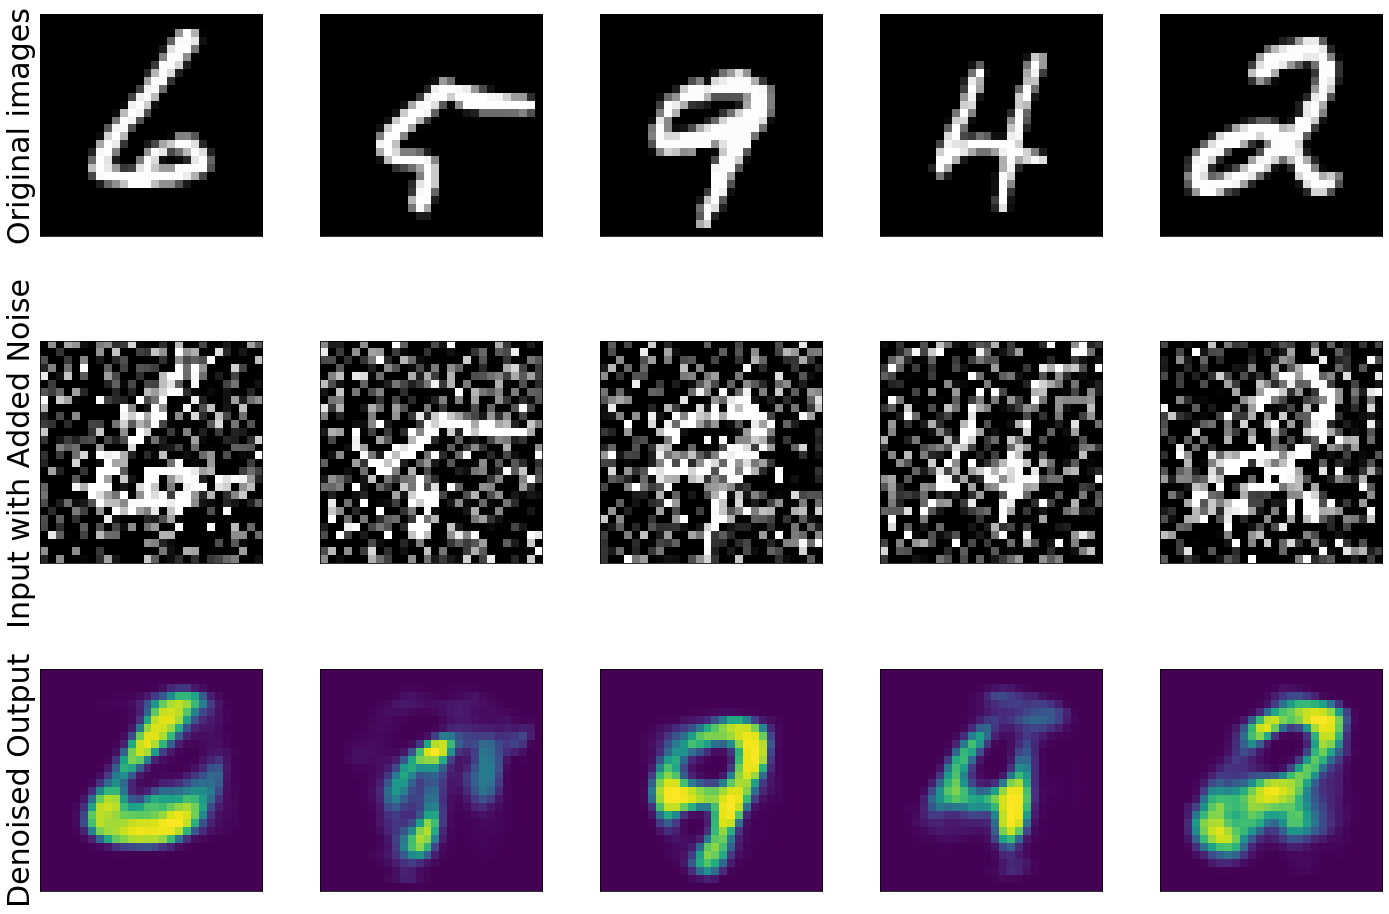

In [23]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11, ax12, ax13, ax14, ax15)) = plt.subplots(3, 5, figsize=(20,13))
randomly_selected_imgs = random.sample(range(output.shape[0]), 5)

for i, ax in enumerate([ax1, ax2, ax3, ax4, ax5]):
    ax.imshow(x_test_reshaped[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    
    if i == 0:
        ax.set_ylabel('Original images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax6, ax7, ax8, ax9, ax10]):
    ax.imshow(x_test_noisy[randomly_selected_imgs[i]].reshape(28, 28), cmap='gray')
    
    if i == 0:
        ax.set_ylabel('Input with Added Noise', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax11, ax12, ax13, ax14, ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28, 28))
    
    if i == 0:
        ax.set_ylabel('Denoised Output', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### Denoising with Deep Convolusional Autoencoder

In [24]:
conv_autoencoder = Sequential()

In [25]:
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same', input_shape=[28, 28, 1]))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [26]:
conv_autoencoder.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 8)         1160      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 8)         584       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 3,217
Trainable params: 3,217
Non-trainable params: 0
_________________________________________________________________


In [27]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [28]:
conv_autoencoder.fit(x_train_noisy.reshape(60000, 28, 28, 1), x_train_reshaped.reshape(60000, 28, 28, 1), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 146s 78ms/step - loss: 0.1251
Epoch 2/10
1875/1875 [==============================] - 148s 79ms/step - loss: 0.1036
Epoch 3/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.1019
Epoch 4/10
1875/1875 [==============================] - 147s 79ms/step - loss: 0.1007
Epoch 5/10
1875/1875 [==============================] - 134s 72ms/step - loss: 0.1000
Epoch 6/10
1875/1875 [==============================] - 131s 70ms/step - loss: 0.0995
Epoch 7/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0990
Epoch 8/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0986
Epoch 9/10
1875/1875 [==============================] - 144s 77ms/step - loss: 0.0982
Epoch 10/10
1875/1875 [==============================] - 152s 81ms/step - loss: 0.0980


In [29]:
output = conv_autoencoder.predict(x_test_noisy.reshape(10000,28,28,1))

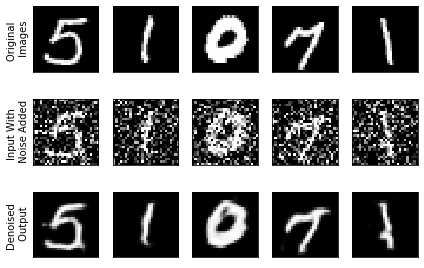

In [30]:
fig, ((ax1, ax2, ax3, ax4, ax5), (ax6, ax7, ax8, ax9, ax10), (ax11,ax12,ax13,ax14,ax15)) = plt.subplots(3, 5)
randomly_selected_imgs = random.sample(range(output.shape[0]),5)

  # 1st row for original images
for i, ax in enumerate([ax1,ax2,ax3,ax4,ax5]):
    ax.imshow(x_test_reshaped[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Original \n Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

  # 2nd row for input with noise added
for i, ax in enumerate([ax6,ax7,ax8,ax9,ax10]):
    ax.imshow(x_test_noisy[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Input With \n Noise Added")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

  # 3rd row for output images from our autoencoder
for i, ax in enumerate([ax11,ax12,ax13,ax14,ax15]):
    ax.imshow(output[randomly_selected_imgs[i]].reshape(28,28), cmap='gray')
    if i == 0:
        ax.set_ylabel("Denoised \n Output")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Denoising PDFs

In [31]:
noisy_imgs_path = 'C:/Users/Rebs/Documents/Dev/nnwithpython-class/Chapter05/Noisy_Documents/noisy/'
clean_imgs_path = 'C:/Users/Rebs/Documents/Dev/nnwithpython-class/Chapter05/Noisy_Documents/clean/'

In [32]:
x_train_noisy = []

for file in sorted(os.listdir(noisy_imgs_path)):
    img = load_img(noisy_imgs_path+file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32')/255
    x_train_noisy.append(img)

x_train_noisy = np.array(x_train_noisy)

In [33]:
print(x_train_noisy.shape)

(216, 420, 540, 1)


In [34]:
x_train_clean = []

for file in sorted(os.listdir(clean_imgs_path)):
    img = load_img(clean_imgs_path+file, color_mode='grayscale', target_size=(420, 540))
    img = img_to_array(img).astype('float32')/255
    x_train_clean.append(img)

x_train_clean = np.array(x_train_clean)

In [35]:
print(x_train_clean.shape)

(216, 420, 540, 1)


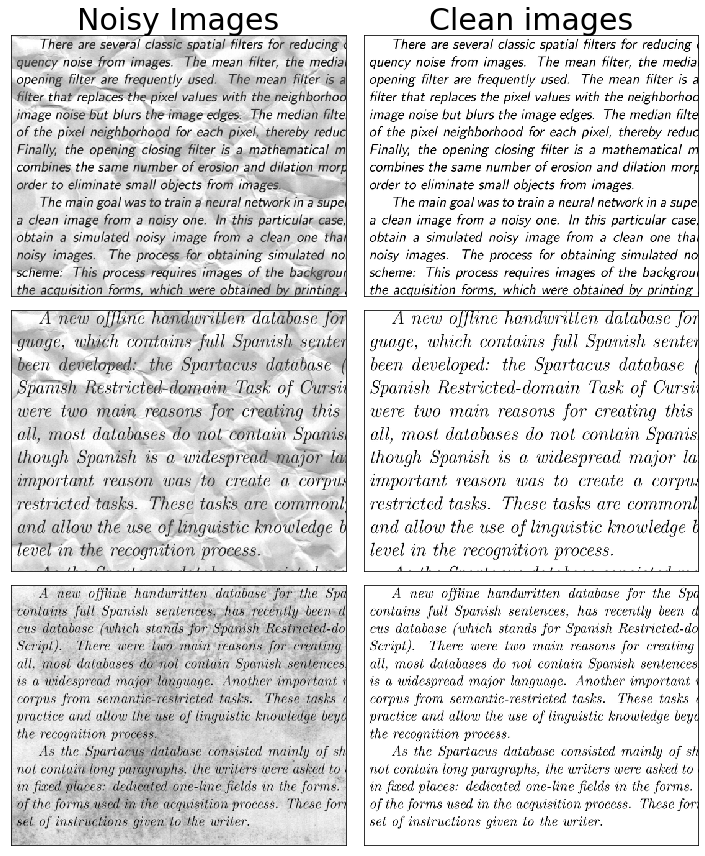

In [36]:
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 12))

randomly_selected_imgs = random.sample(range(x_train_noisy.shape[0]), 3)

for i, ax in enumerate([ax1, ax3, ax5]):
    ax.imshow(x_train_noisy[i].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title('Noisy Images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax4, ax6]):
    ax.imshow(x_train_clean[i].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title('Clean images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

### Train Test Split

In [37]:
x_test_noisy = x_train_noisy[0:20,]
x_train_noisy = x_train_noisy[21:,]

x_test_clean = x_train_clean[0:20,]
x_train_clean = x_train_clean[21:,]

### Modeling

In [38]:
basic_conv_autoencoder = Sequential()

In [39]:
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same', input_shape=(420, 540, 1)))
basic_conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
basic_conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3,3), activation='sigmoid', padding='same'))

In [40]:
basic_conv_autoencoder.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 420, 540, 8)       80        
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 420, 540, 1)       73        
Total params: 737
Trainable params: 737
Non-trainable params: 0
_________________________________________________________________


In [41]:
basic_conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [42]:
basic_conv_autoencoder.fit(x_train_noisy, x_train_clean, epochs=10)

Epoch 1/10
7/7 [==============================] - 26s 4s/step - loss: 0.7403
Epoch 2/10
7/7 [==============================] - 23s 3s/step - loss: 0.6857
Epoch 3/10
7/7 [==============================] - 20s 3s/step - loss: 0.6393
Epoch 4/10
7/7 [==============================] - 25s 4s/step - loss: 0.5732
Epoch 5/10
7/7 [==============================] - 51s 7s/step - loss: 0.4724
Epoch 6/10
7/7 [==============================] - 35s 5s/step - loss: 0.3600
Epoch 7/10
7/7 [==============================] - 34s 5s/step - loss: 0.2882
Epoch 8/10
7/7 [==============================] - 30s 4s/step - loss: 0.2737
Epoch 9/10
7/7 [==============================] - 30s 4s/step - loss: 0.2709
Epoch 10/10
7/7 [==============================] - 31s 4s/step - loss: 0.2573


In [43]:
output = basic_conv_autoencoder.predict(x_test_noisy)

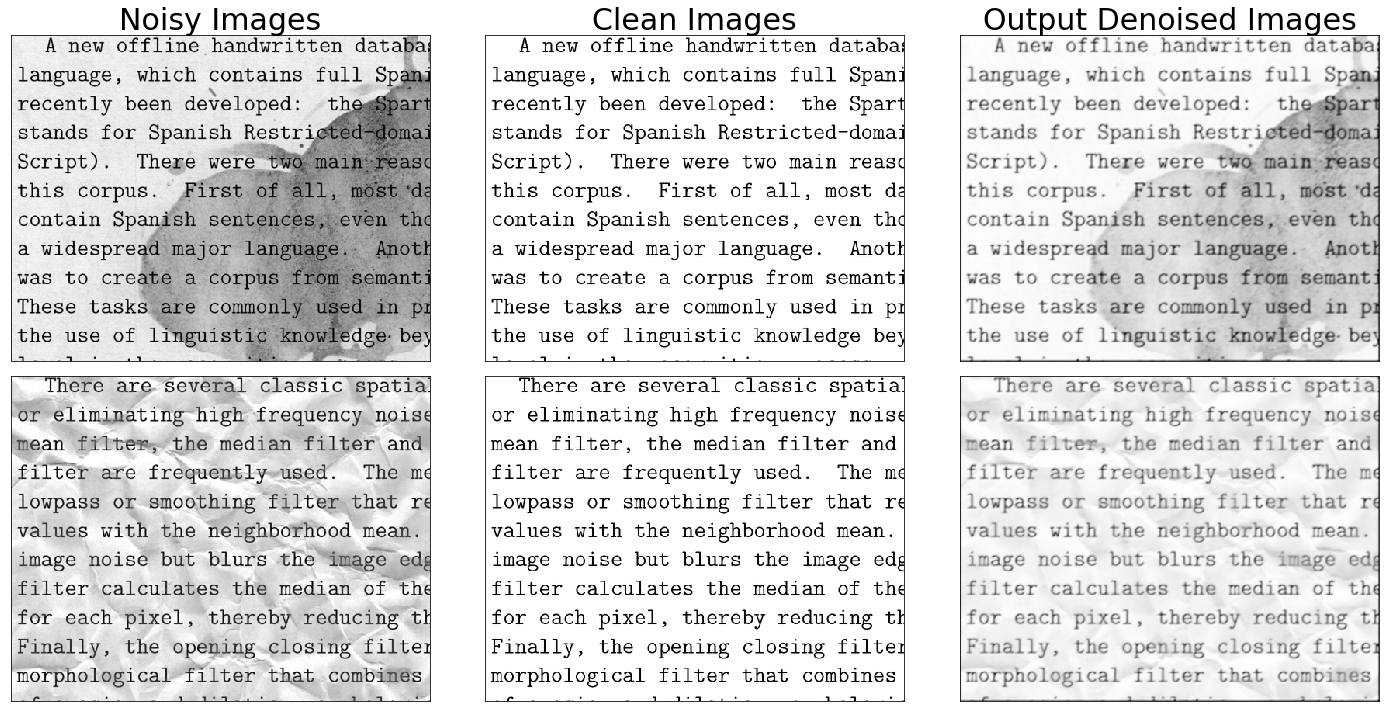

In [44]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, figsize=(20, 10))

randomly_selected_imgs = random.sample(range(x_test_noisy.shape[0]), 2)

for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(x_test_noisy[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title('Noisy Images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(x_test_clean[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title('Clean Images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420, 540), cmap='gray')
    if i == 0:
        ax.set_title('Output Denoised Images', size=30)
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

#### Deep Convolutional Autoencoder Model

In [45]:
conv_autoencoder = Sequential()

In [46]:
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(420, 540, 1)))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=8, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=16, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', padding='same'))
conv_autoencoder.add(Conv2D(filters=1, kernel_size=(3, 3), activation='sigmoid', padding='same'))

In [47]:
conv_autoencoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 420, 540, 32)      320       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 420, 540, 16)      4624      
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 420, 540, 8)       1160      
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 420, 540, 8)       584       
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 420, 540, 16)      1168      
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 420, 540, 32)      4640      
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 420, 540, 1)      

In [48]:
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [49]:
conv_autoencoder.fit(x_train_noisy, x_train_clean, epochs=10)

Epoch 1/10
7/7 [==============================] - 158s 21s/step - loss: 0.5852
Epoch 2/10
7/7 [==============================] - 159s 23s/step - loss: 0.3357
Epoch 3/10
7/7 [==============================] - 161s 22s/step - loss: 0.3229
Epoch 4/10
7/7 [==============================] - 157s 22s/step - loss: 0.3127
Epoch 5/10
7/7 [==============================] - 149s 21s/step - loss: 0.2938
Epoch 6/10
7/7 [==============================] - 148s 21s/step - loss: 0.2767
Epoch 7/10
7/7 [==============================] - 151s 21s/step - loss: 0.2384
Epoch 8/10
7/7 [==============================] - 156s 22s/step - loss: 0.2081
Epoch 9/10
7/7 [==============================] - 156s 22s/step - loss: 0.1902
Epoch 10/10
7/7 [==============================] - 155s 21s/step - loss: 0.1724


In [50]:
output = conv_autoencoder.predict(x_test_noisy)

### Results

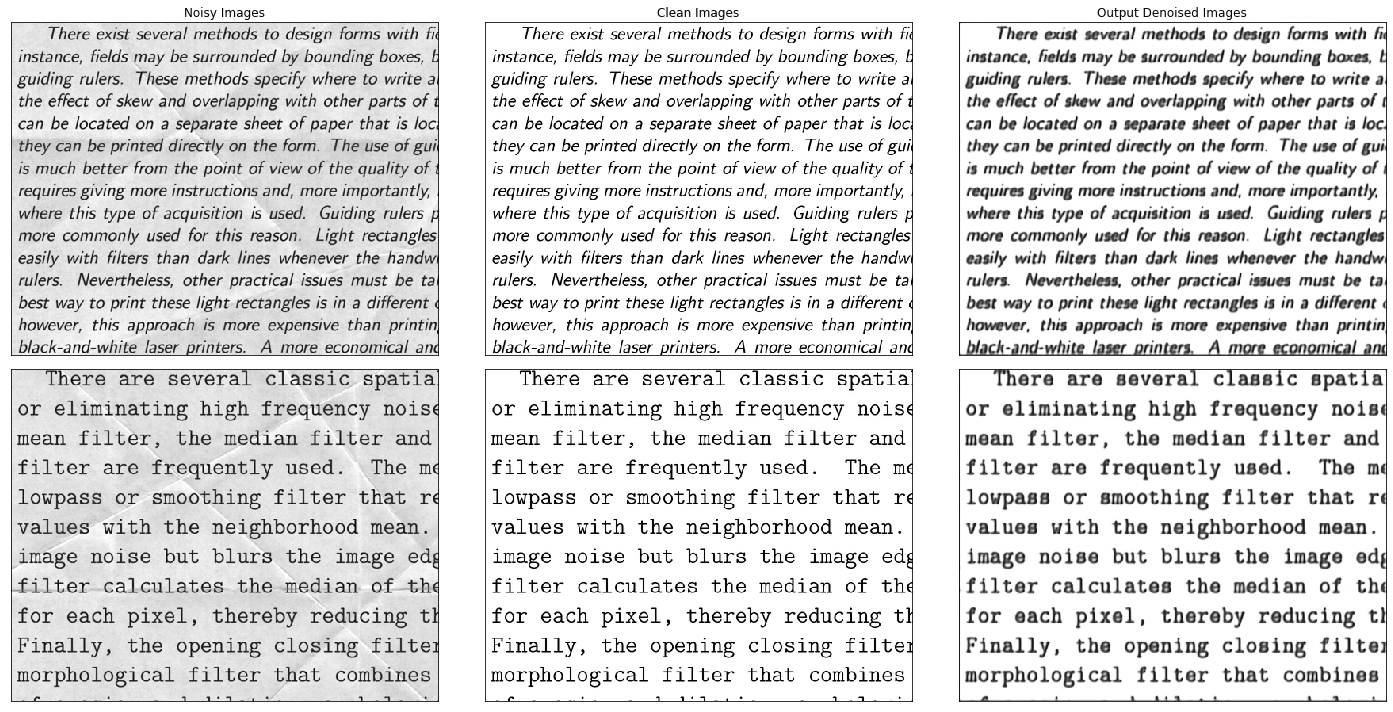

In [57]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3, figsize=(20, 10))

randomly_selected_imgs = random.sample(range(x_test_noisy.shape[0]),2)

for i, ax in enumerate([ax1, ax4]):
    idx = randomly_selected_imgs[i]
    ax.imshow(x_test_noisy[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Noisy Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax2, ax5]):
    idx = randomly_selected_imgs[i]
    ax.imshow(x_test_clean[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Clean Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

for i, ax in enumerate([ax3, ax6]):
    idx = randomly_selected_imgs[i]
    ax.imshow(output[idx].reshape(420,540), cmap='gray')
    if i == 0:
        ax.set_title("Output Denoised Images")
    ax.grid(False)
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()